In [203]:
import numpy as np
import numpy.random as random
import scipy as sp
#import modin.pandas as pd #多核處裡
import pandas as pd 
from pandas import Series,DataFrame

import datetime

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import ast
import csv

import sklearn
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.utils import resample
from sklearn import metrics
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

%matplotlib inline

%precision 3

'%.3f'

In [81]:
def stringConvert(string, punc):
    index = string.find(punc)
    num = string[1:index]
    return num
def removePercent(s):
    s = float(s[:-1])
    return s



In [67]:
# merge files
df = pd.DataFrame()
for i in range(1,7):
    globals()["df"+str(i)] = pd.read_csv("./data/AG_PROFILE_201912_FIN_"+str(i)+".csv",thousands=',',encoding='big5',engine='python')
    df = df.append(globals()["df"+str(i)])
df.to_csv('output.csv')

In [70]:
df = pd.read_csv('output.csv',index_col=0, thousands=',')
df.shape #應為391行

(30000, 391)

In [71]:
df = df.reset_index(drop=True)

0    1080000.0
0     450000.0
0     540000.0
0     900000.0
0     540000.0
0    2250000.0
Name: CLIENT_INCOME, dtype: float64

In [118]:
num_features=[]
object_features=[]
for dtype,feature in zip(df.dtypes,df.columns):
        if dtype =='int64' or dtype=='float64':
            num_features.append(feature)
        #elif dtype=='object':
        else:
            object_features.append(feature)
            
print(f'{len(num_features)} Numeric Features: ') #{num_features}\n')
print(f'{len(object_features)} Object Featurs: ')#{object_features}\n')        

391 Numeric Features: 
0 Object Featurs: 


In [79]:
pd.set_option('display.max_columns', None)
df[object_features].head()

,area_name,office_CITY,CLASS,AG_GP,CHN_AG_RATE_3M,CHN_AG_RATE_6M,CHN_AG_RATE_9M,CHN_AG_RATE_12M,CALLOUT_POL_RATE_HIS,CALLOUT_AG_RATE_3M,CALLOUT_AG_RATE_6M,CALLOUT_AG_RATE_9M,CALLOUT_AG_RATE_12M,CALLOUT_POL_RATE_3M,CALLOUT_POL_RATE_6M,CALLOUT_POL_RATE_9M,CALLOUT_POL_RATE_12M,FAN_CUST_RATE,EVER_VIP_RATE,EVER_VIP_RATE_HIS,UNDERTAKE_CUST_RATE,UNDERTAKE_CUST_RATE_HIS,PURCHASE_CUST_RATE_1YR,PURCHASE_CUST_RATE_2YR,PURCHASE_CUST_RATE_3YR,POL_1_RATE,POL_3_RATE,POL_4_RATE,CONTACT_1_RATE,FOREIGN_CUR_CUST_RATE,FAIL_POL_CUST_RATE,ADDRESS_3_POL_RATE,ADDRESS_4_POL_RATE,ADDRESS_5_POL_RATE,ADDRESS_2_CUST_RATE,ADDRESS_3_CUST_RATE,ADDRESS_4_CUST_RATE,PHONE_3_POL_RATE,PHONE_4_POL_RATE,PHONE_5_POL_RATE,PHONE_2_CUST_RATE,PHONE_3_CUST_RATE,PHONE_4_CUST_RATE,CELL_3_POL_RATE,CELL_4_POL_RATE,CELL_5_POL_RATE,CELL_2_CUST_RATE,CELL_3_CUST_RATE,CELL_4_CUST_RATE,selfpay_RATE,selfpay_REG_RATE,NEW_CUST_RATE,LOAN_POL_RATE,LOAN_CUST_RATE,APL_POL_RATE,APL_CUST_RATE,INVALID_CNT_RATE_3M,INVALID_CNT_RATE_6M,INVALID_CNT_RATE_9M,INVALID_CNT_RATE_12M,DISCON_CNT_RATE_3M,DISCON_CNT_RATE_6M,DISCON_CNT_RATE_9M,DISCON_CNT_RATE_12M,TERMINATION_CNT_RATE_3M,TERMINATION_CNT_RATE_6M,TERMINATION_CNT_RATE_9M,TERMINATION_CNT_RATE_12M,ST_INVALID_CNT_RATE_3M,ST_INVALID_CNT_RATE_6M,ST_INVALID_CNT_RATE_9M,ST_INVALID_CNT_RATE_12M,ST_DISCON_CNT_RATE_3M,ST_DISCON_CNT_RATE_6M,ST_DISCON_CNT_RATE_9M,ST_DISCON_CNT_RATE_12M,ST_TERMINATION_CNT_RATE_3M,ST_TERMINATION_CNT_RATE_6M,ST_TERMINATION_CNT_RATE_9M,ST_TERMINATION_CNT_RATE_12M,CNACEL_CNT_RATE,ST_CNACEL_CNT_RATE_3M,ST_CNACEL_CNT_RATE_6M,ST_CNACEL_CNT_RATE_9M,ST_CNACEL_CNT_RATE_12M,FAIL_CNT_RATE,DISCON_CNT_RATE,TERMINATION_CNT_RATE,TAKE_CNT_RATE,TAKE_CNT_RATE_3M,TAKE_CNT_RATE_6M,TAKE_CNT_RATE_9M,TAKE_CNT_RATE_12M,UNDERTAKE_CNT_RATE,UNDERTAKE_CNT_RATE_3M,UNDERTAKE_CNT_RATE_6M,UNDERTAKE_CNT_RATE_9M,UNDERTAKE_CNT_RATE_12M,FOREIGN_CNT_RATE,FOREIGN_CNT_RATE_3M,FOREIGN_CNT_RATE_6M,FOREIGN_CNT_RATE_9M,FOREIGN_CNT_RATE_12M,CNT_3M_RATE_HIS,CNT_6M_RATE_HIS,CNT_9M_RATE_HIS,CNT_12M_RATE_HIS,AFYP_3M_RATE_HIS,AFYP_6M_RATE_HIS,AFYP_9M_RATE_HIS,AFYP_12M_RATE_HIS,POL_RATE_0M,POL_RATE_1M,POL_RATE_2M,POL_RATE_3M,POL_RATE_4M,POL_RATE_5M,POL_RATE_MAX,REG_CNT_RATE,SIN_CNT_RATE,ILP_CNT_RATE,AH_CNT_RATE,REG_AFYP_RATE,SIN_AFYP_RATE,ILP_AFYP_RATE,AH_AFYP_RATE,REG_CNT_RATE_12M_HIS,SIN_CNT_RATE_12M_HIS,ILP_CNT_RATE_12M_HIS,AH_CNT_RATE_12M_HIS,REG_AFYP_RATE_12M_HIS,SIN_AFYP_RATE_12M_HIS,ILP_AFYP_RATE_12M_HIS,AH_AFYP_RATE_12M_HIS,CLAIM_POL_RATE,CLAIM_CUST_RATE,CLAIM_NO_REJECT_RATE,AHa_CLAIM_POL_RATE,AHa_CLAIM_POL_RATE2,CLAIM_POL_RATE_3M,CLAIM_POL_RATE_6M,CLAIM_POL_RATE_9M,CLAIM_POL_RATE_12M,CLAIM_CUST_RATE_3M,CLAIM_CUST_RATE_6M,CLAIM_CUST_RATE_9M,CLAIM_CUST_RATE_12M,CLAIM_NO_REJECT_RATE_3M,CLAIM_NO_REJECT_RATE_6M,CLAIM_NO_REJECT_RATE_9M,CLAIM_NO_REJECT_RATE_12M,AHa_CLAIM_POL_RATE_3M,AHa_CLAIM_POL_RATE_6M,AHa_CLAIM_POL_RATE_9M,AHa_CLAIM_POL_RATE_12M,AHa_CLAIM_POL_RATE2_3M,AHa_CLAIM_POL_RATE2_6M,AHa_CLAIM_POL_RATE2_9M,AHa_CLAIM_POL_RATE2_12M
0,1,2,1,2,0.2,0.4,0.4,0.4,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.00,0.0000,0.0579,0.0997,0.0952,0.0,0.0,0.0000,0.0089,0.0089,0.6578,0.2791,0.0631,0.7560,0.1905,0.1905,0.4432,0.2784,0.2045,0.2670,0.0739,0.0455,0.3714,0.2048,0.1238,0.2000,0.0524,0.0143,0.3409,0.2159,0.1250,0.0909,0.017,0.0114,0.4580,0.2227,0.0,0.0215,0.0307,0.0447,0.0746,0.0021,0.0082,0.0082,0.0183,0.0021,0.0021,0.002,0.0020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.1324,0.0072,0.0537,0.0089,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1485,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.4062,0.0082,0.0536,0.5320,0.2910,0.1789,0.2170,0.3130,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.5778,0.5625,0.0103,0.7255,5.4706,0.0572,0.0859,0.1109,0.1216,0.0476,0.0714,0.0982,0.1131,0.0526,0.0286,0.0351,0.0405,0.0980,0.1176,0.1569,0.1569,0.0980,0.1569,0.2549,0.3137
1,5,18,1,4,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.00,0.0000,1.0000,0.0000,0.0000,0.0,0.0,

In [74]:
#labelencoder
df["area_name"] = [stringConvert(i, "_") for i in df.area_name]
df["AG_GP"] =  [stringConvert(i, ".") for i in df.AG_GP]
df["CLASS"] = [stringConvert(i, "_") for i in df.CLASS]

df['office_CITY'] = LabelEncoder().fit_transform(df['office_CITY'])

df['area_name']

0        1
1        5
2        5
3        1
4        3
        ..
29995    1
29996    5
29997    4
29998    5
29999    3
Name: area_name, Length: 30000, dtype: object

In [78]:
#object feature裡有些是百分比有些是數值
percent_features = object_features[4:]
#df_percent = pd.DataFrame()

for col in percent_features:
    percent_num = df[col].str.contains('%').value_counts().values[0]
    percent_check = df[col].str.contains('%').value_counts().index[0]
    print("percent_num is" , percent_num)
    print("percent_check is", percent_check)
    if(percent_check == True and percent_num > 10):
        print(col+' contains percent')
        #df_percent[col] = [removePercent(s[1:-1].strip())*(-0.01) if s[0]=='(' else removePercent(s)*0.01 for s in df[col]]
        df[col] = [removePercent(s[1:-1].strip())*(-0.01) if s[0]=='(' else removePercent(s)*0.01 for s in df[col]]
    else:
        print(col+ ' contains float')

percent_num is 30000
percent_check is True
CHN_AG_RATE_3M is percent
percent_num is 30000
percent_check is True
CHN_AG_RATE_6M is percent
percent_num is 30000
percent_check is True
CHN_AG_RATE_9M is percent
percent_num is 30000
percent_check is True
CHN_AG_RATE_12M is percent
percent_num is 30000
percent_check is True
CALLOUT_POL_RATE_HIS is percent
percent_num is 30000
percent_check is True
CALLOUT_AG_RATE_3M is percent
percent_num is 30000
percent_check is True
CALLOUT_AG_RATE_6M is percent
percent_num is 30000
percent_check is True
CALLOUT_AG_RATE_9M is percent
percent_num is 30000
percent_check is True
CALLOUT_AG_RATE_12M is percent
percent_num is 30000
percent_check is True
CALLOUT_POL_RATE_3M is percent
percent_num is 30000
percent_check is True
CALLOUT_POL_RATE_6M is percent
percent_num is 30000
percent_check is True
CALLOUT_POL_RATE_9M is percent
percent_num is 30000
percent_check is True
CALLOUT_POL_RATE_12M is percent
percent_num is 30000
percent_check is True
FAN_CUST_RATE i

percent_num is 30000
percent_check is True
REG_CNT_RATE is percent
percent_num is 30000
percent_check is True
SIN_CNT_RATE is percent
percent_num is 30000
percent_check is True
ILP_CNT_RATE is percent
percent_num is 30000
percent_check is True
AH_CNT_RATE is percent
percent_num is 30000
percent_check is True
REG_AFYP_RATE is percent
percent_num is 30000
percent_check is True
SIN_AFYP_RATE is percent
percent_num is 30000
percent_check is True
ILP_AFYP_RATE is percent
percent_num is 30000
percent_check is True
AH_AFYP_RATE is percent
percent_num is 30000
percent_check is True
REG_CNT_RATE_12M_HIS is percent
percent_num is 30000
percent_check is True
SIN_CNT_RATE_12M_HIS is percent
percent_num is 30000
percent_check is True
ILP_CNT_RATE_12M_HIS is percent
percent_num is 30000
percent_check is True
AH_CNT_RATE_12M_HIS is percent
percent_num is 30000
percent_check is True
REG_AFYP_RATE_12M_HIS is percent
percent_num is 30000
percent_check is True
SIN_AFYP_RATE_12M_HIS is percent
percent_num

['area_name', 'office_CITY', 'CLASS', 'AG_GP']

In [ ]:
for c in object_features :
    print(c)
    for k,v in zip(df[c].index,df[c]):
        if(type(v) == str):
            df[c][k] = float(v.replace(',',''))

In [ ]:
#處理剩下的object type的"數字"資料
import sys
 
sys.setrecursionlimit(1000000) 
for col in object_features:
    print(col)
    df[col] = [float(s.replace(',','')) if type(s) == str else s for s in df[col] ]         

In [83]:
df.to_csv('clean_data.csv')

In [60]:
df = pd.read_csv('clean_data.csv',index_col=0)

In [79]:
df['Y'].value_counts()

0    29805
1      195
Name: Y, dtype: int64

In [61]:
#遺漏值尋找
missing = []
num = df.isna().sum()#pd.series type
for k,v  in zip(num.index,num.values):
     if(v > 0):
          print(k,v)  
          missing.append(k)

CLIENT_INCOME 1428
CHN_AG_RECENCY 13108
CALLOUT_AG_RECENCY 24953
Y_RECENCY_HIS 18759
Y1_RECENCY_HIS 28713
Y2_RECENCY_HIS 21486
Y3_RECENCY_HIS 24563


In [62]:

df['CLIENT_INCOME'] = df['CLIENT_INCOME'].fillna(df['CLIENT_INCOME'].median())
df['CLIENT_INCOME'].isnull().value_counts()

False    30000
Name: CLIENT_INCOME, dtype: int64

In [63]:
for i in missing:
    df[i] = df[i].fillna(-1)

In [64]:
#確認是否還有遺漏值
num = df.isna().sum()#pd.series type
for k,v  in zip(num.index,num.values):
     if(v > 0):
          print(k,v)  


In [67]:
y_train=df['Y']
x_train=df.drop(['Y'],axis = 1)

sm = SMOTE(random_state=11)
x_res, y_res = sm.fit_sample(x_train,y_train)
print(y_res.value_counts())

0    29805
1    29805
Name: Y, dtype: int64


In [124]:
x_res,y_res = BorderlineSMOTE(random_state=42, kind='borderline-2').fit_resample(x_train, y_train)

In [229]:
#rfc = RandomForestClassifier()
gbdt = GradientBoostingClassifier()


gbdt.fit(x_res,y_res)

start = datetime.datetime.now()
feats = pd.Series(data=gbdt.feature_importances_, index=x_res.columns)
end = datetime.datetime.now()
feats = feats.sort_values(ascending=False)
print("running time : ",end-start)
feats[:28]

running time :  0:00:00.003994


Y1_CNT_HIS                 0.084173
INVALID_CNT_RATE_12M       0.076151
Y_CNT_HIS                  0.073549
FAIL_CNT_HIS               0.049804
SIN_AFYP_RATE              0.033358
Y_RECENCY_HIS12            0.024665
selfpay_RATE               0.024653
DISCON_CNT_RATE            0.018725
Y2_CNT_HIS                 0.017772
TERMINATION_CNT_HIS        0.016700
total_aum                  0.015869
AVG_AFYP_REG               0.015457
ADDRESS_2_CUST_RATE        0.015038
TERMINATION_CNT_RATE       0.012959
ST_INVALID_CNT_RATE_12M    0.012566
AVG_AFYP_AH                0.011513
TAKE_CNT_RATE              0.011340
G4_CNT_AG                  0.011213
CELL_4_POL_RATE            0.010333
PHONE_2_CUST_RATE          0.009951
APL_POL_RATE               0.009810
REG_AFYP                   0.009625
CLIENT_INCOME              0.009300
HOLD_CUST_CNT_HIS          0.009071
FAN_CUST_CNT               0.008591
CLAIM_CUST_RATE_12M        0.007646
SIN_AFYP                   0.007377
AVG_AFYP_REG_12M_HIS       0

In [230]:
important_features = list(feats[:28].index)


start = datetime.datetime.now()
gbdt.fit(x_res[important_features],y_res)
end = datetime.datetime.now()

print("running time : ",end-start)



running time :  0:01:05.348895


In [231]:
iteration = np.linspace(0,1,21)
for i in iteration:
    print("percent {:.2f}".format(i))
    print("precision {:.4f}".format(getPrecision(x_res[important_features],y_res,i,29805)))
    print('-----------------')
#print("auc",metrics.roc_auc_score(x_res[important_features],y_res))



percent 0.00
precision 0.0000
-----------------
percent 0.05
precision 0.0000
-----------------
percent 0.10
precision 0.0000
-----------------
percent 0.15
precision 0.0000
-----------------
percent 0.20
precision 0.0000
-----------------
percent 0.25
precision 0.0000
-----------------
percent 0.30
precision 0.0000
-----------------
percent 0.35
precision 0.0000
-----------------
percent 0.40
precision 0.0043
-----------------
percent 0.45
precision 0.0138
-----------------
percent 0.50
precision 0.0522
-----------------
percent 0.55
precision 0.1342
-----------------
percent 0.60
precision 0.2217
-----------------
percent 0.65
precision 0.3156
-----------------
percent 0.70
precision 0.4106
-----------------
percent 0.75
precision 0.5058
-----------------
percent 0.80
precision 0.6031
-----------------
percent 0.85
precision 0.7020
-----------------
percent 0.90
precision 0.8008
-----------------
percent 0.95
precision 0.9004
-----------------
percent 1.00
precision 1.0000
----------

In [228]:
def getPrecision(x,y,propotion,y_num):
    proba = gbdt.predict_proba(x)[:,0]#得到預測機率
    #rank = np.flip(np.sort(proba))
    rankIndex = np.flip(np.argsort(proba))
    num = int(len(rankIndex)*propotion)
    #rank = rank[:num]
    rankIndex = rankIndex[:num]#取得風險機率最高前5%的資料其在原本df的index
    
    
    fraudCount = 0
    for key in rankIndex:
        if(y[key] == 1):
            fraudCount+=1#如果它真的是詐欺
            
    result = fraudCount/y_num
    
    return result
        
    

In [126]:

print(y_res.value_counts())

0    29805
1    29805
Name: Y, dtype: int64


<AxesSubplot:title={'center':'Count'}>

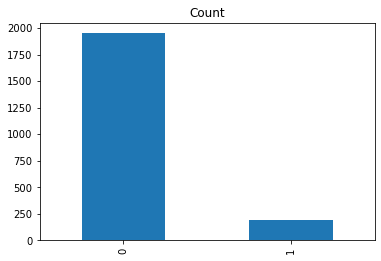

In [130]:
count_class_0, count_class_1 = df['Y'].value_counts()


df_class_0 = df[df['Y'] == 0]#class 0
df_class_1 = df[df['Y'] == 1]#class 1
df_class_0_under = df_class_0.sample(count_class_1*10)#randomly sample 2000 data from class_O 
df_bal = pd.concat([df_class_0_under, df_class_1], axis=0)#merge


df_bal['Y'].value_counts().plot(kind='bar', title='Count')


In [166]:
y_res = df_bal['Y']
x_res = df_bal.drop(['Y'],axis = 1)

In [157]:
x_res

,AGENT_RK,area_name,office_rk,office_CITY,CLASS,AG_GP,AG_AGE,AG_TENURE,SEX,CLIENT_INCOME,...,AHa_CLAIM_POL_CNT2_9M,AHa_CLAIM_POL_CNT2_12M,AHa_CLAIM_POL_RATE_3M,AHa_CLAIM_POL_RATE_6M,AHa_CLAIM_POL_RATE_9M,AHa_CLAIM_POL_RATE_12M,AHa_CLAIM_POL_RATE2_3M,AHa_CLAIM_POL_RATE2_6M,AHa_CLAIM_POL_RATE2_9M,AHa_CLAIM_POL_RATE2_12M
29472,33272,3,139,14,1,4,30,0,0,540000.0,...,2,2,0.0000,0.4000,0.4000,0.4000,0.0000,0.4000,0.4000,0.4000
2983,3414,5,326,18,1,2,35,10,1,900000.0,...,5,6,0.0213,0.0851,0.0851,0.1064,0.0213,0.1064,0.1064,0.1277
26885,30370,1,6,2,1,4,49,23,1,540000.0,...,1,1,0.0000,0.0333,0.0333,0.0333,0.0000,0.0333,0.0333,0.0333
907,1034,2,74,2,1,4,64,31,1,810000.0,...,3,3,0.0811,0.0811,0.0811,0.0811,0.0811,0.0811,0.0811,0.0811
17464,19792,1,97,2,3,2,42,13,1,720000.0,...,3,6,0.0000,0.0435,0.1304,0.2609,0.0000,0.0435,0.1304,0.2609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28645,32340,2,226,2,4,1,53,25,1,5400000.0,...,56,73,0.0402,0.0929,0.1053,0.1331,0.0433,0.1362,0.1734,0.2260
28665,32364,4,260,5,1,4,70,28,0,900000.0,...,10,10,0.2105,0.2632,0.2632,0.2632,0.2105,0.4211,0.5263,0.5263
28723,32426,1,82,2,2,3,40,12,1,1080000.0,...,10,27,0.0351,0.0702,0.0877,0.2105,0.0351,0.0702,0.0877,0.2368
29169,32921,1,215,2,2,4,52,1,0,900000.0,...,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [155]:
y_res.index

Int64Index([29472,  2983, 26885,   907, 17464, 24158, 22163, 13967, 11522,
             2801,
            ...
            28081, 28149, 28195, 28247, 28627, 28645, 28665, 28723, 29169,
            29812],
           dtype='int64', length=2145)

In [158]:
y_res[29472]

0

In [223]:
df = pd.read_csv('train.csv')

In [224]:
pd.set_option('display.max_columns', None)
df.head()

,AGENT_RK,AG_AGE,AG_TENURE,SEX,CLIENT_INCOME,total_aum,AG_LOAN_POL_CNT_HIS,RELATION_POL_CNT,RELATION_CUST_CNT,CHN_AG_CNT_HIS,CHN_AG_CNT_12M,CHN_AG_RATE_12M,CALLOUT_AG_CNT_HIS,CALLOUT_POL_CNT_HIS,CALLOUT_POL_RATE_HIS,CALLOUT_AG_CNT_12M,CALLOUT_POL_CNT_12M,CALLOUT_AG_RATE_12M,CALLOUT_POL_RATE_12M,Y_CNT_HIS,Y1_CNT_HIS,Y2_CNT_HIS,Y3_CNT_HIS,Y_RISK_FLG,Y1_RISK_FLG,Y2_RISK_FLG,Y3_RISK_FLG,HOLD_CUST_CNT,HOLD_CUST_CNT_HIS,AVG_AFYP_HOLD,AVG_POL_CNT_HOLD,AVG_POL_CNT_HOLD_HIS,INS_CUST_CNT,INS_CUST_CNT_HIS,AVG_AFYP_INS,AVG_POL_CNT_INS,AVG_POL_CNT_INS_HIS,G0_CNT_AG,G1_CNT_AG,G2_CNT_AG,G3_CNT_AG,G4_CNT_AG,TOT_CNT_AG,FAN_CUST_CNT,FAN_CUST_RATE,EVER_VIP_CNT,EVER_VIP_CNT_HIS,EVER_VIP_RATE,EVER_VIP_RATE_HIS,UNDERTAKE_CUST_CNT,UNDERTAKE_CUST_CNT_HIS,UNDERTAKE_CUST_RATE,UNDERTAKE_CUST_RATE_HIS,PURCHASE_CUST_CNT_1YR,PURCHASE_CUST_CNT_2YR,PURCHASE_CUST_CNT_3YR,PURCHASE_CUST_RATE_1YR,PURCHASE_CUST_RATE_2YR,PURCHASE_CUST_RATE_3YR,POL_1_CNT,POL_3_CNT,POL_4_CNT,POL_1_RATE,POL_3_RATE,POL_4_RATE,CONTACT_1_CNT,CONTACT_1_RATE,FOREIGN_CUR_CUST_CNT,FOREIGN_CUR_CUST_RATE,FAIL_POL_CUST_CNT,FAIL_POL_CUST_RATE,ADDRESS_3_POL_RATE,ADDRESS_4_POL_RATE,ADDRESS_5_POL_RATE,ADDRESS_2_CUST_RATE,ADDRESS_3_CUST_RATE,ADDRESS_4_CUST_RATE,PHONE_3_POL_RATE,PHONE_4_POL_RATE,PHONE_5_POL_RATE,PHONE_2_CUST_RATE,PHONE_3_CUST_RATE,PHONE_4_CUST_RATE,CELL_3_POL_RATE,CELL_4_POL_RATE,CELL_5_POL_RATE,CELL_2_CUST_RATE,CELL_3_CUST_RATE,CELL_4_CUST_RATE,AG_CELL_SAME_POL_CNT,AG_CELL_SAME_CUST_CNT,AGRELATION_ADDRESS_SAME_POL_CNT,AGRELATION_ADDRESS_SAME_CUST_CNT,AGRELATION_PHONE_SAME_POL_CNT,AGRELATION_PHONE_SAME_CUST_CNT,AGRELATION_CELL_SAME_POL_CNT,AGRELATION_CELL_SAME_CUST_CNT,selfpay_cnt,selfpay_RATE,selfpay_REG_cnt,selfpay_REG_RATE,NEW_CUST,NEW_CUST_RATE,LOAN_POL_CNT_HIS,LOAN_POL_RATE,LOAN_CUST_CNT_HIS,LOAN_CUST_RATE,APL_POL_CNT_HIS,APL_POL_RATE,APL_CUST_CNT_HIS,APL_CUST_RATE,VALID_CNT_12M,INVALID_CNT_12M,INVALID_CNT_RATE_12M,DISCON_CNT_12M,DISCON_CNT_RATE_12M,TERMINATION_CNT_12M,TERMINATION_CNT_RATE_12M,ST_INVALID_CNT_12M,ST_INVALID_CNT_RATE_12M,ST_DISCON_CNT_12M,ST_DISCON_CNT_RATE_12M,ST_TERMINATION_CNT_12M,ST_TERMINATION_CNT_RATE_12M,CNACEL_CNT_HIS,ST_CNACEL_CNT_12M,CNACEL_CNT_RATE,ST_CNACEL_CNT_RATE_12M,FAIL_CNT_HIS,FAIL_CNT_RATE,DISCON_CNT_HIS,DISCON_CNT_RATE,TERMINATION_CNT_HIS,TERMINATION_CNT_RATE,TAKE_CNT_HIS,TAKE_CNT_RATE,TAKE_CNT_12M,TAKE_CNT_RATE_12M,UNDERTAKE_CNT_HIS,UNDERTAKE_CNT_RATE,UNDERTAKE_CNT_12M,UNDERTAKE_CNT_RATE_12M,FOREIGN_CNT_HIS,FOREIGN_CNT_RATE,FOREIGN_CNT_12M,FOREIGN_CNT_RATE_12M,TOT_CNT_12M_HIS,CNT_12M_RATE_HIS,TOT_AFYP_12M_HIS,AFYP_12M_RATE_HIS,AVG_AFYP_12M_HIS,POLCNT_TREND_FLG,AFYP_TREND_FLG,POL_RATE_0M,POL_RATE_1M,POL_RATE_2M,POL_RATE_3M,POL_RATE_4M,POL_RATE_5M,POL_RATE_MAX,POL_RATE_JUMP_FLG,POL_RATE_JUMP_FLG2,REG_CNT,SIN_CNT,ILP_CNT,AH_CNT,REG_CNT_RATE,SIN_CNT_RATE,ILP_CNT_RATE,AH_CNT_RATE,REG_AFYP,SIN_AFYP,ILP_AFYP,AH_AFYP,REG_AFYP_RATE,SIN_AFYP_RATE,ILP_AFYP_RATE,AH_AFYP_RATE,AVG_AFYP_REG,AVG_AFYP_SIN,AVG_AFYP_ILP,AVG_AFYP_AH,TOT_CNT,TOT_AFYP,AVG_AFYP,TOT_CNT_HIS,TOT_AFYP_HIS,AVG_AFYP_HIS,AHa_CNT_HIS,REG_CNT_12M_HIS,SIN_CNT_12M_HIS,ILP_CNT_12M_HIS,AH_CNT_12M_HIS,REG_CNT_RATE_12M_HIS,SIN_CNT_RATE_12M_HIS,ILP_CNT_RATE_12M_HIS,AH_CNT_RATE_12M_HIS,REG_AFYP_12M_HIS,SIN_AFYP_12M_HIS,ILP_AFYP_12M_HIS,AH_AFYP_12M_HIS,REG_AFYP_RATE_12M_HIS,SIN_AFYP_RATE_12M_HIS,ILP_AFYP_RATE_12M_HIS,AH_AFYP_RATE_12M_HIS,AVG_AFYP_REG_12M_HIS,AVG_AFYP_SIN_12M_HIS,AVG_AFYP_ILP_12M_HIS,AVG_AFYP_AH_12M_HIS,CLAIM_NO_CNT,CLAIM_POL_CNT,CLAIM_POL_RATE,CLAIM_CUST_CNT,CLAIM_CUST_RATE,AVG_CLAIM_NO_AMT,AVG_CLAIM_POL_AMT,AVG_CLAIM_CUST_AMT,CLAIM_NO_REJECT_CNT,CLAIM_NO_REJECT_RATE,AHa_CLAIM_POL_CNT,AHa_CLAIM_POL_CNT2,AHa_CLAIM_POL_RATE,AHa_CLAIM_POL_RATE2,CLAIM_NO_CNT_12M,CLAIM_POL_CNT_12M,CLAIM_POL_RATE_12M,CLAIM_CUST_CNT_12M,CLAIM_CUST_RATE_12M,CLAIM_NO_TREND_FLG,CLAIM_POL_TREND_FLG,CLAIM_CUST_TREND_FLG,AVG_CLAIM_NO_AMT_12M,AVG_CLAIM_POL_AMT_12M,AVG_CLAIM_CUST_AMT_12M,CLAIM_NO_REJECT_CNT_12M,CLAIM_NO_REJECT_RATE_12M,AHa_CLAIM_POL_CNT_12M,AHa_CLAIM_POL_CNT2_12M,AHa_CLAIM_POL_RATE_12M,AHa_CLAIM_

In [164]:
df['Y'].value_counts()

0    29805
1      195
Name: Y, dtype: int64

In [167]:
y_res = df['Y']
x_res = df.drop(['Y'],axis = 1)

In [225]:
df_majority = df[df.Y==0]
df_minority = df[df.Y==1]

df_minority_upsampled = resample(df_minority, replace=True, n_samples=29805, random_state=123)
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [226]:
y_res = df_upsampled['Y']
x_res = df_upsampled.drop(['Y'],axis = 1)

In [227]:
x_res = x_res.reset_index(drop = True)
y_res = y_res.reset_index(drop = True)

In [194]:
len(x_res.index)

59610

In [218]:
gbdt = GradientBoostingClassifier()
gbdt.predict_proba(x_res)

NotFittedError: This GradientBoostingClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [216]:
gbdt = GradientBoostingClassifier()
x_res

,AGENT_RK,AG_AGE,AG_TENURE,SEX,CLIENT_INCOME,total_aum,AG_LOAN_POL_CNT_HIS,RELATION_POL_CNT,RELATION_CUST_CNT,CHN_AG_CNT_HIS,CHN_AG_CNT_12M,CHN_AG_RATE_12M,CALLOUT_AG_CNT_HIS,CALLOUT_POL_CNT_HIS,CALLOUT_POL_RATE_HIS,CALLOUT_AG_CNT_12M,CALLOUT_POL_CNT_12M,CALLOUT_AG_RATE_12M,CALLOUT_POL_RATE_12M,Y_CNT_HIS,Y1_CNT_HIS,Y2_CNT_HIS,Y3_CNT_HIS,Y_RISK_FLG,Y1_RISK_FLG,Y2_RISK_FLG,Y3_RISK_FLG,HOLD_CUST_CNT,HOLD_CUST_CNT_HIS,AVG_AFYP_HOLD,AVG_POL_CNT_HOLD,AVG_POL_CNT_HOLD_HIS,INS_CUST_CNT,INS_CUST_CNT_HIS,AVG_AFYP_INS,AVG_POL_CNT_INS,AVG_POL_CNT_INS_HIS,G0_CNT_AG,G1_CNT_AG,G2_CNT_AG,G3_CNT_AG,G4_CNT_AG,TOT_CNT_AG,FAN_CUST_CNT,FAN_CUST_RATE,EVER_VIP_CNT,EVER_VIP_CNT_HIS,EVER_VIP_RATE,EVER_VIP_RATE_HIS,UNDERTAKE_CUST_CNT,UNDERTAKE_CUST_CNT_HIS,UNDERTAKE_CUST_RATE,UNDERTAKE_CUST_RATE_HIS,PURCHASE_CUST_CNT_1YR,PURCHASE_CUST_CNT_2YR,PURCHASE_CUST_CNT_3YR,PURCHASE_CUST_RATE_1YR,PURCHASE_CUST_RATE_2YR,PURCHASE_CUST_RATE_3YR,POL_1_CNT,POL_3_CNT,POL_4_CNT,POL_1_RATE,POL_3_RATE,POL_4_RATE,CONTACT_1_CNT,CONTACT_1_RATE,FOREIGN_CUR_CUST_CNT,FOREIGN_CUR_CUST_RATE,FAIL_POL_CUST_CNT,FAIL_POL_CUST_RATE,ADDRESS_3_POL_RATE,ADDRESS_4_POL_RATE,ADDRESS_5_POL_RATE,ADDRESS_2_CUST_RATE,ADDRESS_3_CUST_RATE,ADDRESS_4_CUST_RATE,PHONE_3_POL_RATE,PHONE_4_POL_RATE,PHONE_5_POL_RATE,PHONE_2_CUST_RATE,PHONE_3_CUST_RATE,PHONE_4_CUST_RATE,CELL_3_POL_RATE,CELL_4_POL_RATE,CELL_5_POL_RATE,CELL_2_CUST_RATE,CELL_3_CUST_RATE,CELL_4_CUST_RATE,AG_CELL_SAME_POL_CNT,AG_CELL_SAME_CUST_CNT,AGRELATION_ADDRESS_SAME_POL_CNT,AGRELATION_ADDRESS_SAME_CUST_CNT,AGRELATION_PHONE_SAME_POL_CNT,AGRELATION_PHONE_SAME_CUST_CNT,AGRELATION_CELL_SAME_POL_CNT,AGRELATION_CELL_SAME_CUST_CNT,selfpay_cnt,selfpay_RATE,selfpay_REG_cnt,selfpay_REG_RATE,NEW_CUST,NEW_CUST_RATE,LOAN_POL_CNT_HIS,LOAN_POL_RATE,LOAN_CUST_CNT_HIS,LOAN_CUST_RATE,APL_POL_CNT_HIS,APL_POL_RATE,APL_CUST_CNT_HIS,APL_CUST_RATE,VALID_CNT_12M,INVALID_CNT_12M,INVALID_CNT_RATE_12M,DISCON_CNT_12M,DISCON_CNT_RATE_12M,TERMINATION_CNT_12M,TERMINATION_CNT_RATE_12M,ST_INVALID_CNT_12M,ST_INVALID_CNT_RATE_12M,ST_DISCON_CNT_12M,ST_DISCON_CNT_RATE_12M,ST_TERMINATION_CNT_12M,ST_TERMINATION_CNT_RATE_12M,CNACEL_CNT_HIS,ST_CNACEL_CNT_12M,CNACEL_CNT_RATE,ST_CNACEL_CNT_RATE_12M,FAIL_CNT_HIS,FAIL_CNT_RATE,DISCON_CNT_HIS,DISCON_CNT_RATE,TERMINATION_CNT_HIS,TERMINATION_CNT_RATE,TAKE_CNT_HIS,TAKE_CNT_RATE,TAKE_CNT_12M,TAKE_CNT_RATE_12M,UNDERTAKE_CNT_HIS,UNDERTAKE_CNT_RATE,UNDERTAKE_CNT_12M,UNDERTAKE_CNT_RATE_12M,FOREIGN_CNT_HIS,FOREIGN_CNT_RATE,FOREIGN_CNT_12M,FOREIGN_CNT_RATE_12M,TOT_CNT_12M_HIS,CNT_12M_RATE_HIS,TOT_AFYP_12M_HIS,AFYP_12M_RATE_HIS,AVG_AFYP_12M_HIS,POLCNT_TREND_FLG,AFYP_TREND_FLG,POL_RATE_0M,POL_RATE_1M,POL_RATE_2M,POL_RATE_3M,POL_RATE_4M,POL_RATE_5M,POL_RATE_MAX,POL_RATE_JUMP_FLG,POL_RATE_JUMP_FLG2,REG_CNT,SIN_CNT,ILP_CNT,AH_CNT,REG_CNT_RATE,SIN_CNT_RATE,ILP_CNT_RATE,AH_CNT_RATE,REG_AFYP,SIN_AFYP,ILP_AFYP,AH_AFYP,REG_AFYP_RATE,SIN_AFYP_RATE,ILP_AFYP_RATE,AH_AFYP_RATE,AVG_AFYP_REG,AVG_AFYP_SIN,AVG_AFYP_ILP,AVG_AFYP_AH,TOT_CNT,TOT_AFYP,AVG_AFYP,TOT_CNT_HIS,TOT_AFYP_HIS,AVG_AFYP_HIS,AHa_CNT_HIS,REG_CNT_12M_HIS,SIN_CNT_12M_HIS,ILP_CNT_12M_HIS,AH_CNT_12M_HIS,REG_CNT_RATE_12M_HIS,SIN_CNT_RATE_12M_HIS,ILP_CNT_RATE_12M_HIS,AH_CNT_RATE_12M_HIS,REG_AFYP_12M_HIS,SIN_AFYP_12M_HIS,ILP_AFYP_12M_HIS,AH_AFYP_12M_HIS,REG_AFYP_RATE_12M_HIS,SIN_AFYP_RATE_12M_HIS,ILP_AFYP_RATE_12M_HIS,AH_AFYP_RATE_12M_HIS,AVG_AFYP_REG_12M_HIS,AVG_AFYP_SIN_12M_HIS,AVG_AFYP_ILP_12M_HIS,AVG_AFYP_AH_12M_HIS,CLAIM_NO_CNT,CLAIM_POL_CNT,CLAIM_POL_RATE,CLAIM_CUST_CNT,CLAIM_CUST_RATE,AVG_CLAIM_NO_AMT,AVG_CLAIM_POL_AMT,AVG_CLAIM_CUST_AMT,CLAIM_NO_REJECT_CNT,CLAIM_NO_REJECT_RATE,AHa_CLAIM_POL_CNT,AHa_CLAIM_POL_CNT2,AHa_CLAIM_POL_RATE,AHa_CLAIM_POL_RATE2,CLAIM_NO_CNT_12M,CLAIM_POL_CNT_12M,CLAIM_POL_RATE_12M,CLAIM_CUST_CNT_12M,CLAIM_CUST_RATE_12M,CLAIM_NO_TREND_FLG,CLAIM_POL_TREND_FLG,CLAIM_CUST_TREND_FLG,AVG_CLAIM_NO_AMT_12M,AVG_CLAIM_POL_AMT_12M,AVG_CLAIM_CUST_AMT_12M,CLAIM_NO_REJECT_CNT_12M,CLAIM_NO_REJECT_RATE_12M,AHa_CLAIM_POL_CNT_12M,AHa_CLAIM_POL_CNT2_12M,AHa_CLAIM_POL_RATE_12M,AHa_CLAIM_